# Levanto y visualizo el .json que resume las corridas de todas las combinaciones de ensambles probadas.

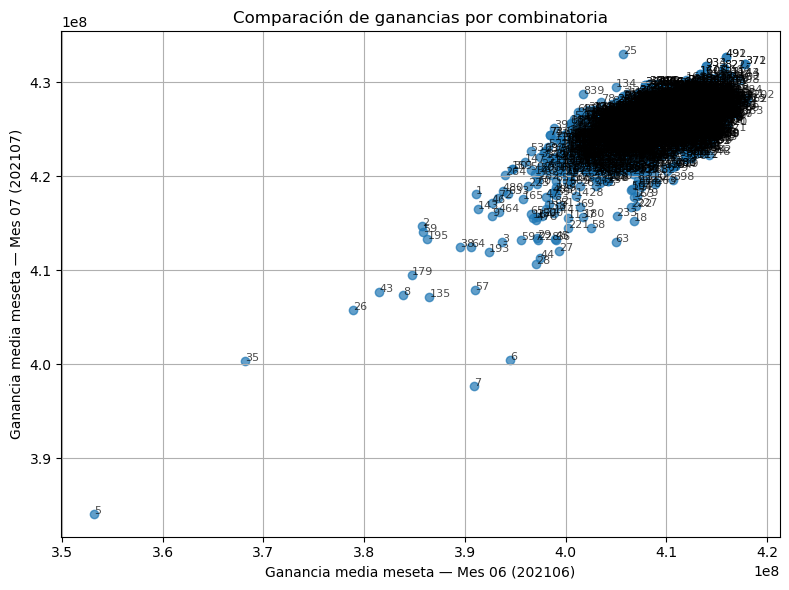

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Cargar JSON ---
with open("combinatoria_ensambles_finales.json", "r") as f:
    data = json.load(f)

# --- 2. Convertir JSON a DataFrame ---
rows = []

for combinacion_id, meses in data.items():
    fila = {
        "combinacion": combinacion_id,
        "ganancia_202106": meses.get("202106", {}).get("ganancia_media_meseta", None),
        "ganancia_202107": meses.get("202107", {}).get("ganancia_media_meseta", None),
    }
    rows.append(fila)

df = pd.DataFrame(rows)

# --- 3. Graficar scatterplot ---
plt.figure(figsize=(8,6))
plt.scatter(df["ganancia_202106"], df["ganancia_202107"], alpha=0.7)

plt.xlabel("Ganancia media meseta — Mes 06 (202106)")
plt.ylabel("Ganancia media meseta — Mes 07 (202107)")
plt.title("Comparación de ganancias por combinatoria")

# Etiquetas opcionales con el ID de la combinatoria
for i, row in df.iterrows():
    plt.text(row["ganancia_202106"], row["ganancia_202107"], row["combinacion"],
             fontsize=8, alpha=0.7)

plt.grid(True)
plt.tight_layout()
plt.show()


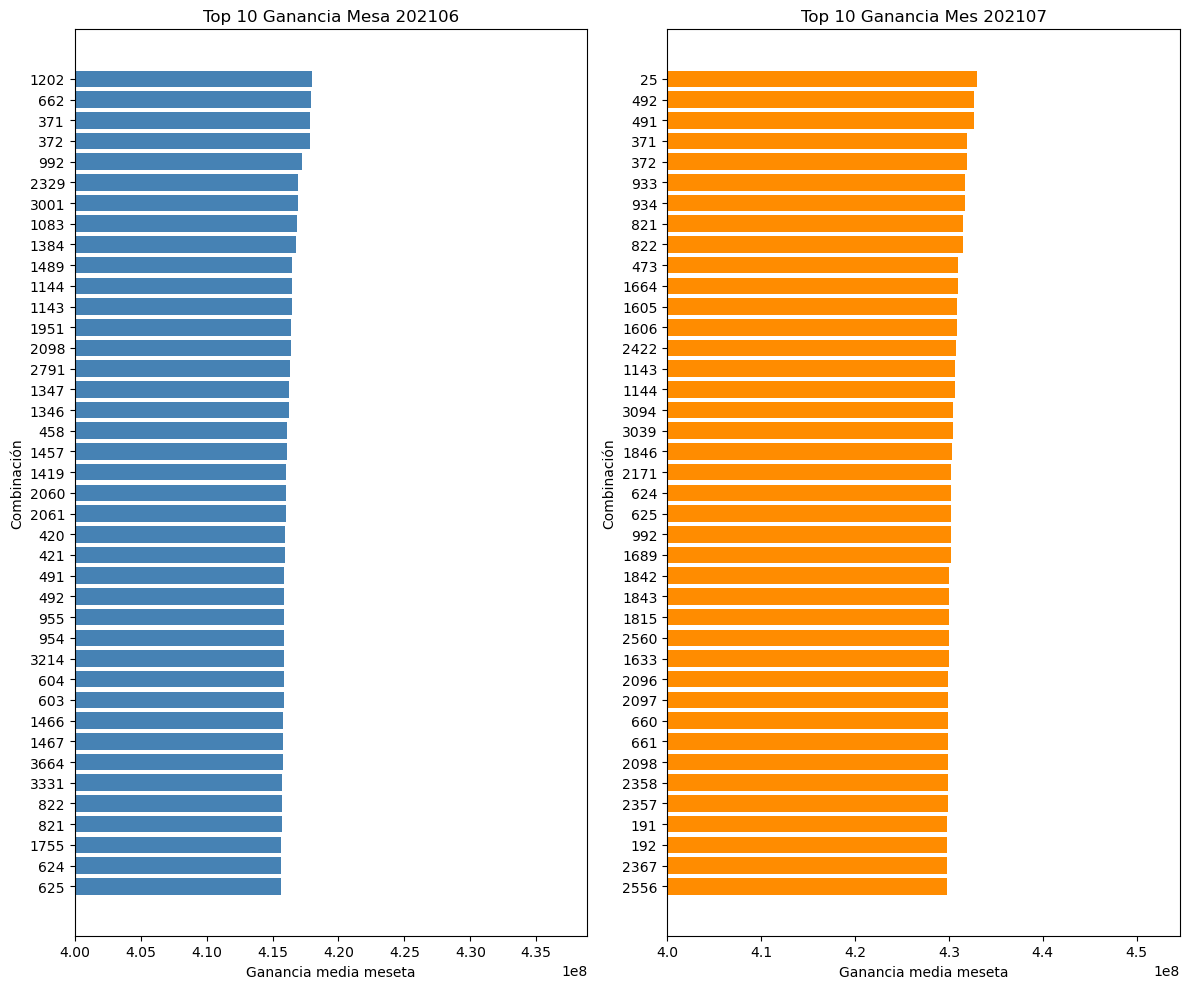

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Suponemos que ya tenés:
# df = pd.DataFrame(rows)

# --- 1. Top 10 por ganancia en 202106 ---
top10_06 = df[['combinacion', 'ganancia_202106']] \
    .dropna() \
    .sort_values('ganancia_202106', ascending=False) \
    .head(40)

# --- 2. Top 10 por ganancia en 202107 ---
top10_07 = df[['combinacion', 'ganancia_202107']] \
    .dropna() \
    .sort_values('ganancia_202107', ascending=False) \
    .head(40)

# --- 3. Gráficos ---

plt.figure(figsize=(12, 10))

# --- Barplot 202106 ---
ax1 = plt.subplot(1, 2, 1)
ax1.barh(top10_06['combinacion'], top10_06['ganancia_202106'], color='steelblue')
ax1.invert_yaxis()  # Mayor arriba
ax1.set_title("Top 10 Ganancia Mesa 202106")
ax1.set_xlabel("Ganancia media meseta")
ax1.set_ylabel("Combinación")
ax1.set_xlim(4e8, top10_06['ganancia_202106'].max() * 1.05)  # Desde 400M hasta un poco más que el máximo

# --- Barplot 202107 ---
ax2 = plt.subplot(1, 2, 2)
ax2.barh(top10_07['combinacion'], top10_07['ganancia_202107'], color='darkorange')
ax2.invert_yaxis()
ax2.set_title("Top 10 Ganancia Mes 202107")
ax2.set_xlabel("Ganancia media meseta")
ax2.set_ylabel("Combinación")
ax2.set_xlim(4e8, top10_07['ganancia_202107'].max() * 1.05)

plt.tight_layout()
plt.show()